In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
dt.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Shape of data
dt.shape       # Rows-8425 columns=23

(8425, 23)

In [4]:
# Cheking Missing data
dt.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
# Observation
# Date & Location- No missing value & nominal data
# MinTemp-    75 Missing Value & Continious data & fill the data with mean of the data
# MaxTemp-     60 missing value & continious data & fill the data with mean of the data
# Rainfall-    240 Missing value.& Continious data & fill the data with mean of the data
# Evaporation & sunshine- Both data missing 50% of total data so we will drop both column.
# WindGustDir-    data missing near about 1000 nos of total & data Catagorical Data
# WindGustSpeed-   data missing near about 1000 nos of total data. Continious data
# WindDir9am-      data missing near about 1000 nos of total data. & data Catagorical Data
# WindDir9am-      308 missing data. & fill the data with mean of the data
# WindSpeed9am -   76 Missing data & Continious data & fill the data with mean of the data
# WindSpeed3pm -  107 Missing data & Continious data & fill the data with mean of the data
# Humidity9am -   59 Missing data & Continious data & fill the data with mean of the data
# Humidity3pm-    102 Missing data & Continious data & fill the data with mean of the data
# Pressure9am -   1309 Missing data & Continious data & fill the data with mean of the data
# Pressure3pm -  1312 Missing data & Continious data & fill the data with mean of the data
# Cloud9am -     2421 Missing data & Continious data & Drop column due to more number of data missing in dataset
# Cloud3pm  -    2455 Missing data & Continious data & drop column due to more number of data missing in dataset
# Temp9am            56 Missing data & Continious data & fill the data with mean of the data
# Temp3pm            96 Missing data & Continious data & fill the data with mean of the data
# RainToday         240 Missing data & Catagorical data & fill the data with mode of the data
# RainTomorrow      239 Missing data & Catagorical data & fill the data with mode of the data

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
# Target value rainTomorrow is object value.
# Other features are also object.
# have to convert object to number.

<AxesSubplot:xlabel='Location', ylabel='RainTomorrow'>

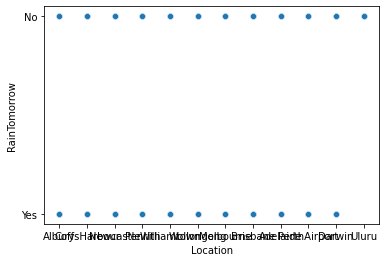

In [8]:
# cheking distribute the data with target value
sns.scatterplot(dt['Location'],dt['RainTomorrow'])

<AxesSubplot:xlabel='MinTemp', ylabel='RainTomorrow'>

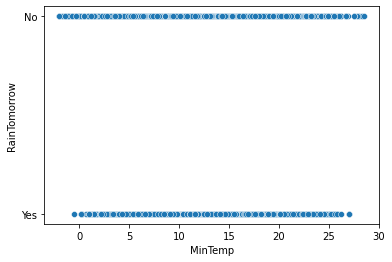

In [9]:
sns.scatterplot(dt['MinTemp'],dt['RainTomorrow'])

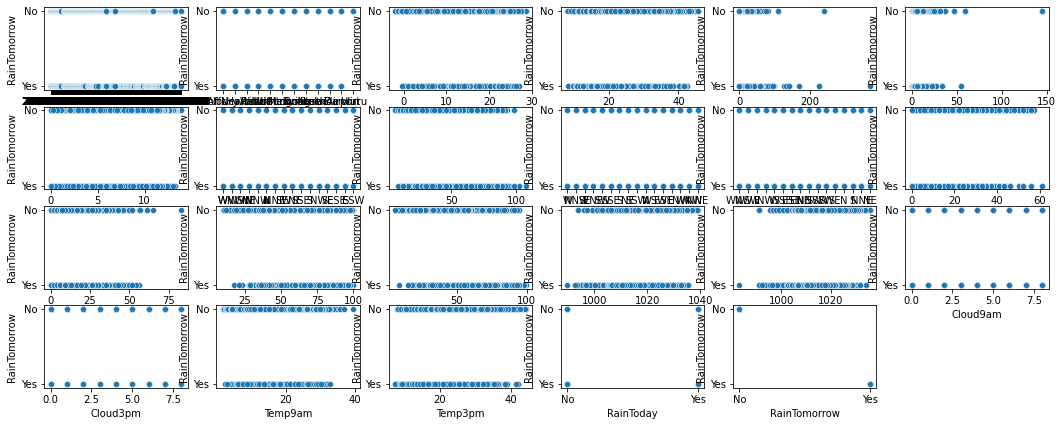

In [10]:
plt.figure(figsize=(18,7))
plotnumber=1 
for i in dt:
    if plotnumber<=24:
        ax=plt.subplot(4,6,plotnumber)
        sns.scatterplot(dt[i],dt['RainTomorrow'])
        plt.xlabel(i, fontsize=10)
    plotnumber+=1
plt.show()

In [11]:
# Observation
# Data is normal distributed in each columns

In [12]:
# plt.figure(figsize=(18,10))
# plotnumber=1 
# for i in dt:
#     if plotnumber<=24:
#         ax=plt.subplot(4,6,plotnumber)
#         sns.distplot(dt[i])
#         plt.xlabel(i, fontsize=10)
#     plotnumber+=1
# plt.show()

In [5]:
# Drop the column
dt.drop(['Date','Location','Evaporation','Sunshine'],axis=1,inplace=True)

In [6]:
dt.shape

(8425, 19)

In [7]:
dt.drop_duplicates(inplace=True)  # removed duplicate data

In [8]:
dt.shape

(6752, 19)

In [17]:
# After removing duplicate value, rows=6752 nos

E      518
SW     465
N      459
W      434
WSW    420
WNW    398
SSE    390
S      376
SE     370
ENE    357
NE     300
SSW    299
NW     296
NNE    287
ESE    267
NNW    184
Name: WindGustDir, dtype: int64


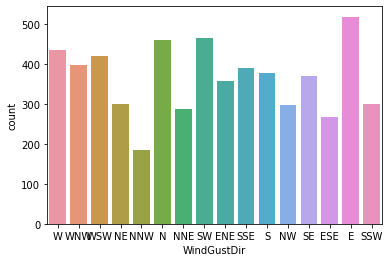

In [18]:
# valuecount of Catagorycal data column
print(dt['WindGustDir'].value_counts())
ax=sns.countplot(x='WindGustDir',data=dt)

No     5050
Yes    1572
Name: RainToday, dtype: int64


Text(0.5, 1.0, 'RainToday')

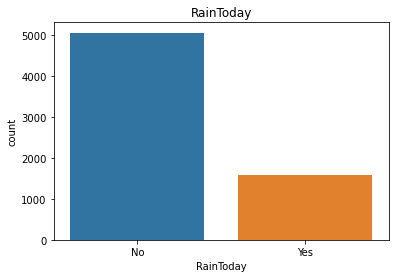

In [19]:
print(dt['RainToday'].value_counts())
ax=sns.countplot(x='RainToday',data=dt)
plt.title('RainToday')

No     5050
Yes    1572
Name: RainTomorrow, dtype: int64


Text(0.5, 1.0, 'targate value')

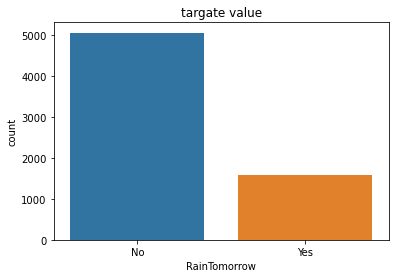

In [20]:
print(dt['RainTomorrow'].value_counts())
ax=sns.countplot(x='RainTomorrow',data=dt)
plt.title('targate value')

In [21]:
#  RainTomorrow is NO count-5050 Yes-1572
# 5050 times are not possible to rain tomorrow. & 1572 times is possible to rain tomorrow

In [22]:
dt.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
#  using encoder to convert the aobject into number
from sklearn.preprocessing import OrdinalEncoder
ord_en=OrdinalEncoder()

In [10]:
for i in dt.columns:
    if dt[i].dtypes=='object':
        dt[i]=ord_en.fit_transform(dt[i].values.reshape(-1,1))

In [25]:
dt.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [26]:
# now data is encoded by ordinal encoder. object value is converted into number.


In [11]:
dt.isna().sum()

MinTemp            60
MaxTemp            47
Rainfall          130
WindGustDir       932
WindGustSpeed     932
WindDir9am        784
WindDir3pm        284
WindSpeed9am       53
WindSpeed3pm       90
Humidity9am        44
Humidity3pm        86
Pressure9am      1298
Pressure3pm      1301
Cloud9am         1856
Cloud3pm         1892
Temp9am            41
Temp3pm            82
RainToday         130
RainTomorrow      130
dtype: int64

In [12]:
dt['MinTemp']=dt['MinTemp'].fillna(dt['MinTemp'].mean())

In [13]:
# we will fill the NaN value
dt['MinTemp']=dt['MinTemp'].fillna(dt['MinTemp'].mean())
dt['MaxTemp']=dt['MaxTemp'].fillna(dt['MaxTemp'].mean())
dt['Rainfall']=dt['Rainfall'].fillna(dt['Rainfall'].mean())
dt['WindGustDir']=dt['WindGustDir'].fillna(dt['WindGustDir'].mode()[0])
dt['WindGustSpeed']=dt['WindGustSpeed'].fillna(dt['WindGustSpeed'].mean())
dt['WindDir9am']=dt['WindDir9am'].fillna(dt['WindDir9am'].mode()[0])
dt['WindDir3pm']=dt['WindDir3pm'].fillna(dt['WindDir3pm'].mode()[0])
dt['WindSpeed9am']=dt['WindSpeed9am'].fillna(dt['WindSpeed9am'].mean())
dt['WindSpeed3pm']=dt['WindSpeed3pm'].fillna(dt['WindSpeed3pm'].mean())
dt['Humidity9am']=dt['Humidity9am'].fillna(dt['Humidity9am'].mean())
dt['Humidity3pm']=dt['Humidity3pm'].fillna(dt['Humidity3pm'].mean())
dt['Pressure9am']=dt['Pressure9am'].fillna(dt['Pressure9am'].mean())
dt['Pressure3pm']=dt['Pressure3pm'].fillna(dt['Pressure3pm'].mean())
dt['Cloud9am']=dt['Cloud9am'].fillna(dt['Cloud9am'].mean())
dt['Cloud3pm']=dt['Cloud3pm'].fillna(dt['Cloud3pm'].mean())
dt['Temp9am']=dt['Temp9am'].fillna(dt['Temp9am'].mean())
dt['Temp3pm']=dt['Temp3pm'].fillna(dt['Temp3pm'].mean())
dt['RainToday']=dt['RainToday'].fillna(dt['RainToday'].median())
dt['RainTomorrow']=dt['RainTomorrow'].fillna(dt['RainTomorrow'].median())

In [14]:
dt['WindGustSpeed'].mean()

38.97766323024024

In [15]:
dt.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [32]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6752 entries, 0 to 8424
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        6752 non-null   float64
 1   MaxTemp        6752 non-null   float64
 2   Rainfall       6752 non-null   float64
 3   WindGustDir    6752 non-null   float64
 4   WindGustSpeed  6752 non-null   float64
 5   WindDir9am     6752 non-null   float64
 6   WindDir3pm     6752 non-null   float64
 7   WindSpeed9am   6752 non-null   float64
 8   WindSpeed3pm   6752 non-null   float64
 9   Humidity9am    6752 non-null   float64
 10  Humidity3pm    6752 non-null   float64
 11  Pressure9am    6752 non-null   float64
 12  Pressure3pm    6752 non-null   float64
 13  Cloud9am       6752 non-null   float64
 14  Cloud3pm       6752 non-null   float64
 15  Temp9am        6752 non-null   float64
 16  Temp3pm        6752 non-null   float64
 17  RainToday      6752 non-null   float64
 18  RainTomo

In [33]:
# Observation
# No missing data is Available in dataset
#  Data in float value.

In [34]:
# data loss for duplicate value.
(8425-6725)/8425*100

20.178041543026705

In [35]:
dt.describe()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.00000,6752.00000
mean,13.109145,24.098345,2.780988,6.620261,38.977663,7.019254,7.841084,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561,0.23282,0.23282
std,5.544769,6.134661,10.490421,5.231429,13.386361,4.551447,4.489994,9.794823,9.555704,17.195422,18.512037,6.032376,5.972056,2.476481,2.324996,5.726648,5.976267,0.42266,0.42266
min,-2.000000,8.200000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.00000,0.00000
25%,9.000000,19.600000,0.000000,1.000000,30.000000,3.000000,4.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000,0.00000,0.00000
50%,13.109145,23.500000,0.000000,7.000000,38.977663,7.000000,8.000000,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.250000,0.00000,0.00000
75%,17.400000,28.400000,1.200000,12.000000,46.000000,11.000000,12.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,0.00000,0.00000
max,28.500000,45.500000,371.000000,15.000000,107.000000,15.000000,15.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.00000,1.00000


In [36]:
# Observation
# Mean & std is not good in all columns
# There are skewness & Outlier.

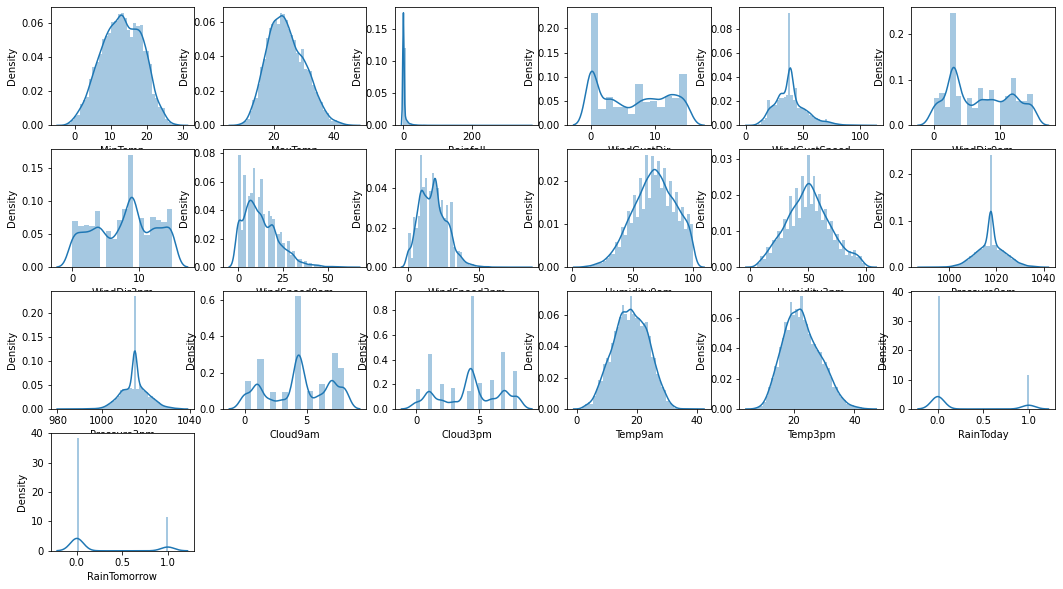

In [37]:
plt.figure(figsize=(18,10))
plotnumber=1 
for i in dt:
    if plotnumber<=24:
        ax=plt.subplot(4,6,plotnumber)
        sns.distplot(dt[i])
        plt.xlabel(i, fontsize=10)
    plotnumber+=1
plt.show()

In [38]:
# Observation
# Rainfall- Right skewness present
# WindGustSpeed-Right skewness present. o to 80 data is normal distributed
# WindSpeed9am- Right skewness present 0 to 50 data is normal distributed
# WindSpeed3pm- Right skewness present 0 to 50 data is normal distributed
# Pressure9am-data normaly distributed 1000 t0 1030.
# Pressure3pm-data normaly distributed 1000 to 1030. right & left skewness is presemnt


In [39]:
# corelation all feature with target value
dt.corr().abs()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.728065,0.092372,0.136411,0.242738,0.020778,0.139559,0.169397,0.188276,0.154248,0.067683,0.441253,0.440363,0.095403,0.047495,0.891425,0.696419,0.075950,0.097167
MaxTemp,0.728065,1.000000,0.087658,0.196156,0.165528,0.192795,0.160975,0.056377,0.115623,0.424951,0.430526,0.337845,0.413150,0.245116,0.241542,0.866584,0.974695,0.225800,0.160354
Rainfall,0.092372,0.087658,1.000000,0.027744,0.089989,0.091647,0.032074,0.051830,0.022697,0.228656,0.243397,0.073006,0.034082,0.196191,0.162655,0.004172,0.091988,0.459227,0.224223
WindGustDir,0.136411,0.196156,0.027744,1.000000,0.010046,0.377787,0.456350,0.062626,0.131275,0.015345,0.025415,0.101158,0.024398,0.115308,0.078340,0.153413,0.209296,0.111538,0.044211
WindGustSpeed,0.242738,0.165528,0.089989,0.010046,1.000000,0.071975,0.078169,0.591784,0.620606,0.268973,0.095502,0.394164,0.363104,0.013532,0.058182,0.221725,0.129756,0.085825,0.184476
WindDir9am,0.020778,0.192795,0.091647,0.377787,0.071975,1.000000,0.217121,0.057344,0.045514,0.015594,0.126798,0.027570,0.051724,0.079357,0.058152,0.071128,0.201383,0.157291,0.039712
WindDir3pm,0.139559,0.160975,0.032074,0.456350,0.078169,0.217121,1.000000,0.010745,0.084889,0.005578,0.009618,0.139030,0.049333,0.070568,0.050586,0.146463,0.174894,0.094743,0.004513
WindSpeed9am,0.169397,0.056377,0.051830,0.062626,0.591784,0.057344,0.010745,1.000000,0.551348,0.373061,0.121519,0.177664,0.147296,0.024997,0.022110,0.152106,0.041762,0.033374,0.057952
WindSpeed3pm,0.188276,0.115623,0.022697,0.131275,0.620606,0.045514,0.084889,0.551348,1.000000,0.259812,0.100704,0.248316,0.208384,0.013567,0.021128,0.207860,0.092975,0.011846,0.043419
Humidity9am,0.154248,0.424951,0.228656,0.015345,0.268973,0.015594,0.005578,0.373061,0.259812,1.000000,0.639470,0.137254,0.173859,0.420958,0.320440,0.407533,0.418024,0.387348,0.287838


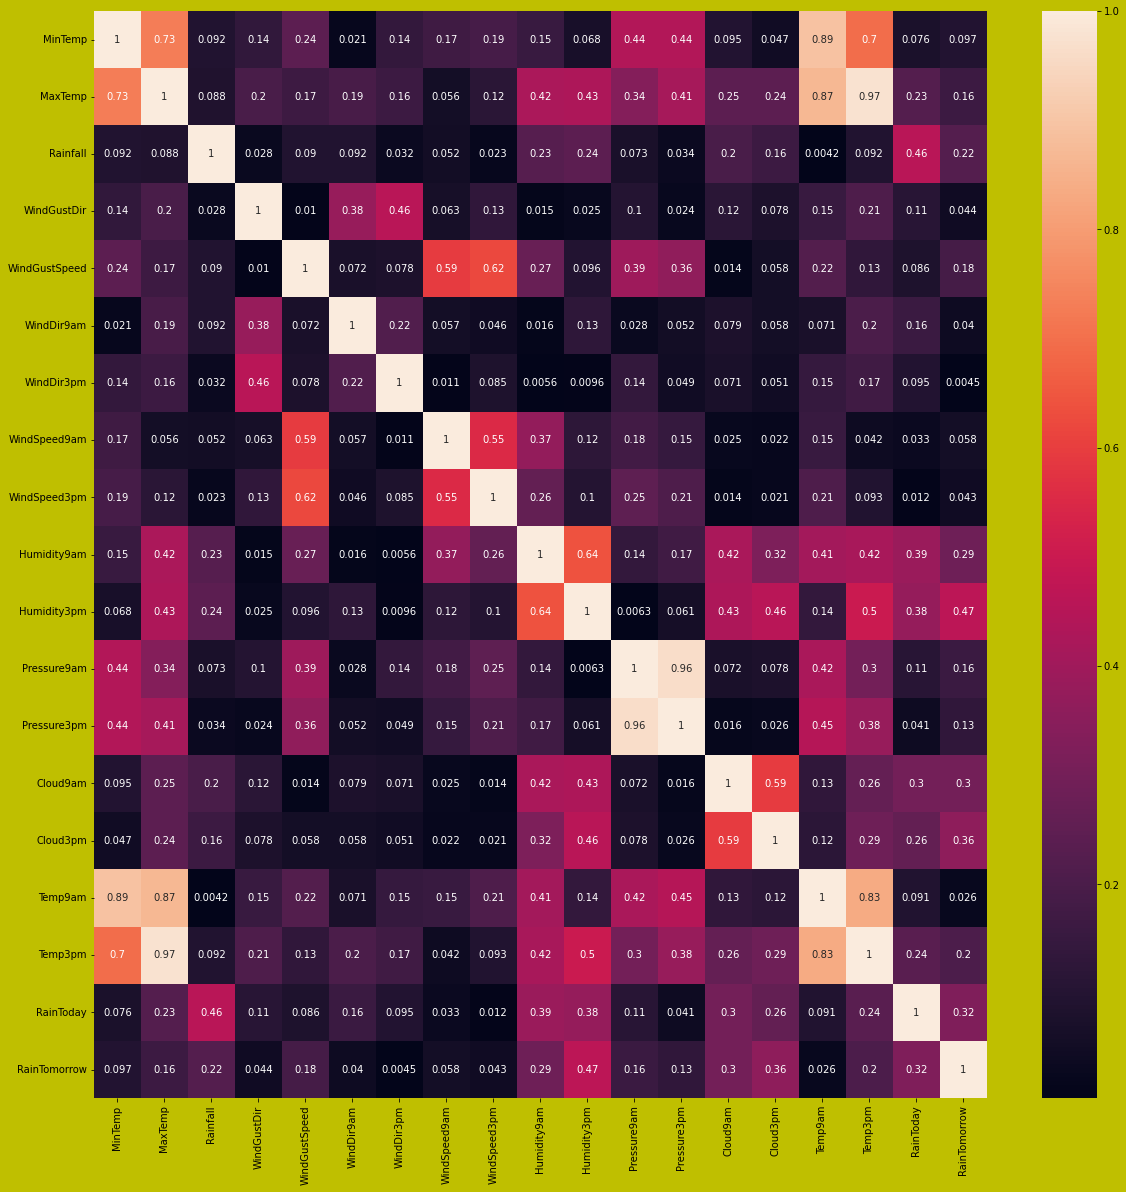

In [40]:
plt.figure(figsize=(20,20),facecolor='y')
sns.heatmap(dt.corr().abs(),annot=True)
plt.show()

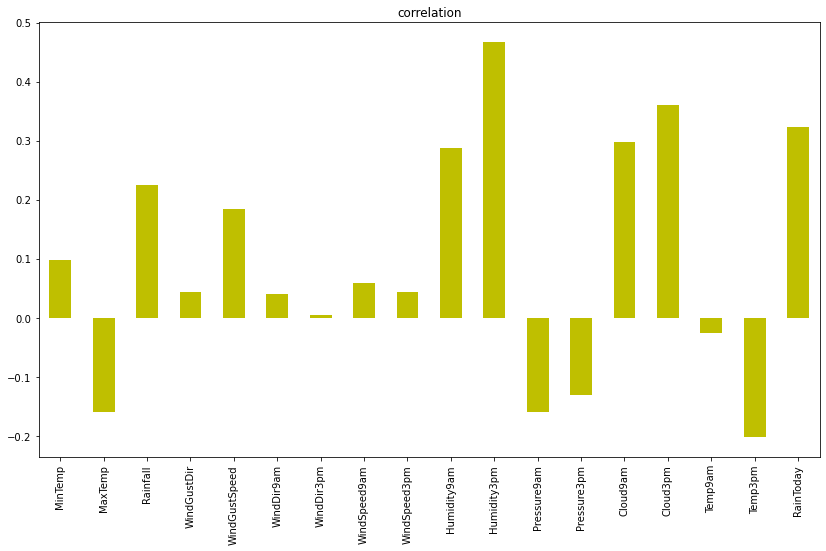

In [41]:
plt.figure(figsize=(14,8))
dt.corr()['RainTomorrow'].drop(['RainTomorrow']).plot(kind='bar',color='y')
plt.title('correlation')
plt.show()

In [42]:
# Observation
# WindDir3pm & Temp9am- Both data columns are not much relationship with target value.

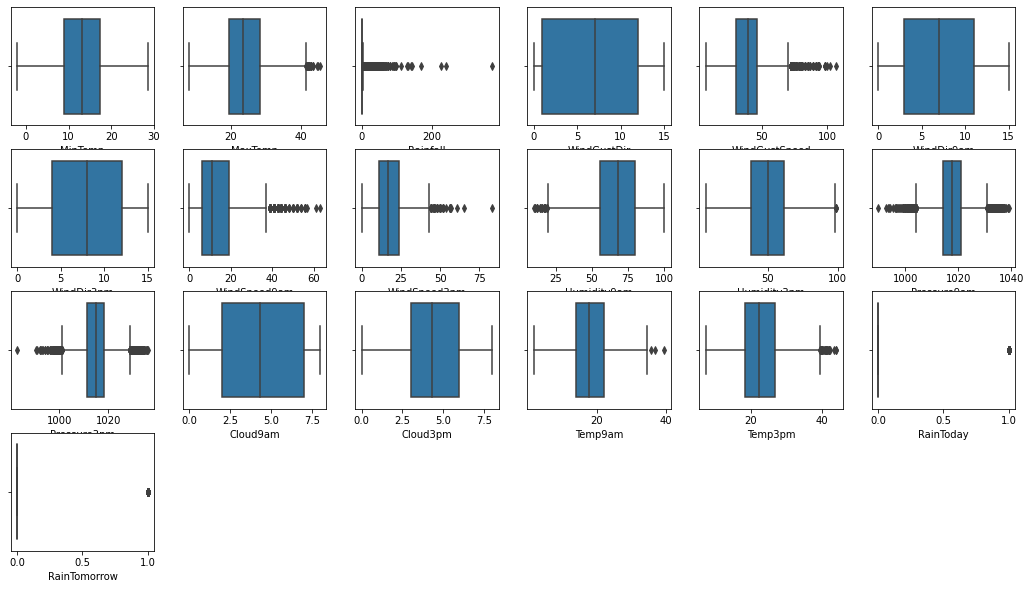

In [43]:
# Cheking outlier
plt.figure(figsize=(18,10))
plotnumber=1 
for i in dt:
    if plotnumber<=24:
        ax=plt.subplot(4,6,plotnumber)
        sns.boxplot(dt[i])
        plt.xlabel(i, fontsize=10)
        
        
    plotnumber+=1
plt.show()

In [44]:
# Observation
# MaxTemp - Outlier is present
# Rainfall - Outlier present
# winfgustpeed - Outlier present
# windspeed9am - Outlier present
# windspeed3pm - Outlier present
# Humidity9am - Outlier present
#  Pressure9am - outlier present
#  Pressure3pm - outlier present
# Temp9am - Outlier present
# Temp3pm- Outlier present


In [45]:
dt.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [16]:
# Handeling the outlier usie Z score
from scipy.stats import zscore
z_socore=zscore(dt[['MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm']])
z_score_abs=np.abs(z_socore)
filter=(z_score_abs<3).all(axis=1)
dt=dt[filter]

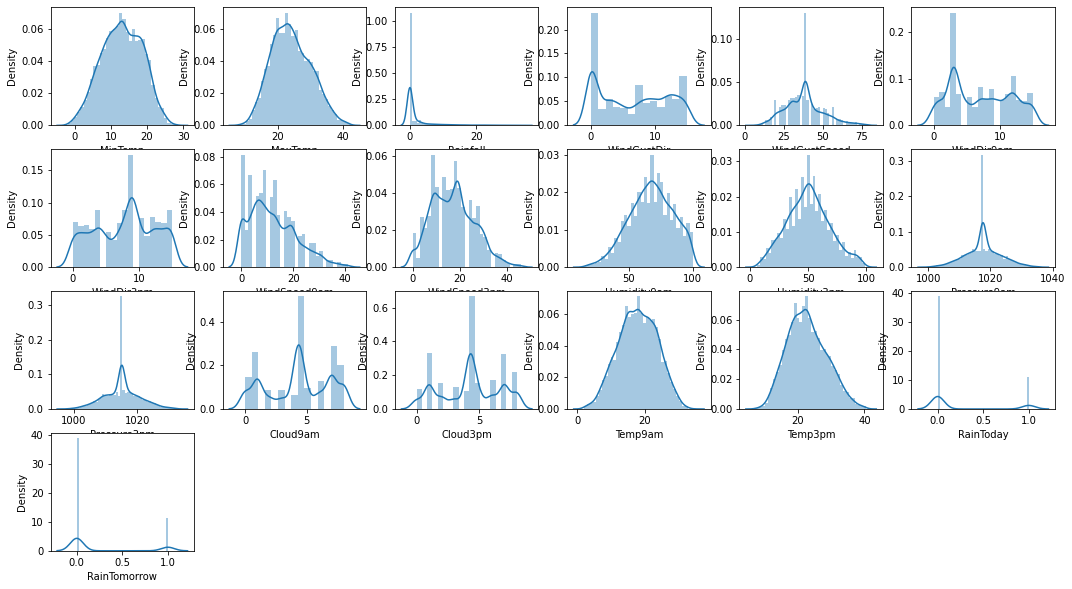

In [47]:
# Cheking data distributed after aply z score

plt.figure(figsize=(18,10))
plotnumber=1 
for i in dt:
    if plotnumber<=24:
        ax=plt.subplot(4,6,plotnumber)
        sns.distplot(dt[i])
        plt.xlabel(i, fontsize=10)
    plotnumber+=1
plt.show()

In [48]:
# now data distributed is okay. minimize the outlier

In [49]:
dt.shape

(6450, 19)

In [50]:
# cheking skewness
dt.skew()

MinTemp         -0.083247
MaxTemp          0.263298
Rainfall         3.513117
WindGustDir      0.098778
WindGustSpeed    0.478657
WindDir9am       0.207136
WindDir3pm      -0.127188
WindSpeed9am     0.679717
WindSpeed3pm     0.340248
Humidity9am     -0.229715
Humidity3pm      0.160401
Pressure9am      0.059232
Pressure3pm      0.087454
Cloud9am        -0.203926
Cloud3pm        -0.146280
Temp9am         -0.075379
Temp3pm          0.286562
RainToday        1.334820
RainTomorrow     1.329441
dtype: float64

In [51]:
# Skew threshold +->0.5
#  Only rainfall skewness is more than +0.5
# RainToday skewness is also >0.5 but it is catagorical data so no need to minimize the skewness. 

In [17]:
x=dt.drop(['RainTomorrow'],axis=1)
y=dt.RainTomorrow

In [18]:
# Standarize the data & minimize the skewness
from sklearn.preprocessing import PowerTransformer

In [19]:
pt=PowerTransformer()
pt.fit_transform(x)

array([[ 0.07197422, -0.13592948,  0.69479785, ..., -0.16992317,
        -0.09174342, -0.53492203],
       [-1.01404343,  0.22714345, -0.67256555, ..., -0.11720872,
         0.32812983, -0.53492203],
       [-0.01787021,  0.32348028, -0.67256555, ...,  0.55160418,
         0.1460914 , -0.53492203],
       ...,
       [-1.3809729 ,  0.51295977, -0.67256555, ..., -0.9413641 ,
         0.61760133, -0.53492203],
       [-0.94101595,  0.52856411, -0.67256555, ..., -0.48591469,
         0.60177891, -0.53492203],
       [ 0.34092369,  0.06381485, -0.67256555, ..., -0.5034543 ,
        -0.24854741, -0.53492203]])

In [55]:
dt.skew()

MinTemp         -0.083247
MaxTemp          0.263298
Rainfall         3.513117
WindGustDir      0.098778
WindGustSpeed    0.478657
WindDir9am       0.207136
WindDir3pm      -0.127188
WindSpeed9am     0.679717
WindSpeed3pm     0.340248
Humidity9am     -0.229715
Humidity3pm      0.160401
Pressure9am      0.059232
Pressure3pm      0.087454
Cloud9am        -0.203926
Cloud3pm        -0.146280
Temp9am         -0.075379
Temp3pm          0.286562
RainToday        1.334820
RainTomorrow     1.329441
dtype: float64

In [20]:
# Relationship checking in feature- one featur to othere feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['Feature']=x.columns
vif

,vif,Feature
0,56.547271,MinTemp
1,441.001520,MaxTemp
2,2.295443,Rainfall
3,3.913819,WindGustDir
4,21.838727,WindGustSpeed
5,4.445489,WindDir9am
6,5.625464,WindDir3pm
7,5.533733,WindSpeed9am
8,8.765320,WindSpeed3pm
9,67.472726,Humidity9am


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import cross_val_score

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=88,test_size=0.25)

In [24]:
def matric_score(lr,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=lr.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=lr.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
       

### LogisticRegression Model

In [61]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [62]:
matric_score(lr,x_train,x_test,y_train,y_test,train=True)
matric_score(lr,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 83.67%

==========Test Result==========

Accuracy Score : 83.32%
classification report 
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      1240
         1.0       0.74      0.43      0.55       373

    accuracy                           0.83      1613
   macro avg       0.79      0.69      0.72      1613
weighted avg       0.82      0.83      0.82      1613



In [63]:
# Cheking Cross val Score for madel overfitting or not
round(cross_val_score(lr,x,y,cv=9).mean()*100)

83

### lr Model is not overfitting. cross val score is same with test accuracy score

In [64]:
# we want to imporove result by using hyperparameter tune
param={'max_iter': [10,15,20],
      'n_jobs':[2,3,5,9,10]}

In [65]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(lr,param_grid=param)
grid.fit(x_train,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [10, 15, 20], 'n_jobs': [2, 3, 5, 9, 10]})

In [66]:
grid.best_params_

{'max_iter': 20, 'n_jobs': 2}

In [67]:
lr=LogisticRegression(max_iter= 20, n_jobs= 2)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=20, n_jobs=2)

In [68]:
matric_score(lr,x_train,x_test,y_train,y_test,train=True)
matric_score(lr,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 83.13%

==========Test Result==========

Accuracy Score : 82.52%
classification report 
               precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      1240
         1.0       0.77      0.35      0.48       373

    accuracy                           0.83      1613
   macro avg       0.80      0.66      0.69      1613
weighted avg       0.82      0.83      0.80      1613



### KNeighborsClassifier Model

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [70]:
def matric_score(calssi,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=knn.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=knn.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
        print('con_matrix')
        print(confusion_matrix(y_test,pred1))

In [71]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [72]:
matric_score(knn,x_train,x_test,y_train,y_test,train=True)
matric_score(knn,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 87.18%

==========Test Result==========

Accuracy Score : 82.52%
classification report 
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      1240
         1.0       0.69      0.44      0.54       373

    accuracy                           0.83      1613
   macro avg       0.77      0.69      0.71      1613
weighted avg       0.81      0.83      0.81      1613

con_matrix
[[1168   72]
 [ 210  163]]


In [73]:
# Cheking Cross val Score for madel overfitting or not
round(cross_val_score(knn,x,y,cv=9).mean()*100)

80

In [74]:
# model is not overfitting bcz cross val score & accuracy score is colse to same.

In [75]:
# Use hyperparameter for increase result
pram={'n_neighbors':[2,3,4,5,6,7,8,9,10],
     'algorithm':['kd_tree', 'brute'],
     'leaf_size':range(10,20),
     }

In [76]:
grid=GridSearchCV(knn,param_grid=pram)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(10, 20),
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [77]:
grid.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 9}

In [78]:
knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 10, n_neighbors = 9)

In [80]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=9)

In [81]:
matric_score(knn,x_train,x_test,y_train,y_test,train=True)
matric_score(knn,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 85.84%

==========Test Result==========

Accuracy Score : 83.51%
classification report 
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1240
         1.0       0.75      0.43      0.55       373

    accuracy                           0.84      1613
   macro avg       0.80      0.69      0.72      1613
weighted avg       0.83      0.84      0.82      1613

con_matrix
[[1185   55]
 [ 211  162]]


In [82]:
# Accuracy score of test is increased.

###   RandomForest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()

In [26]:
def matric_score(calssi,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=ran.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=ran.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))

In [27]:
ran.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
matric_score(ran,x_train,x_test,y_train,y_test,train=True)
matric_score(ran,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 100.00%

==========Test Result==========

Accuracy Score : 84.07%
classification report 
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      1240
         1.0       0.75      0.46      0.57       373

    accuracy                           0.84      1613
   macro avg       0.80      0.71      0.74      1613
weighted avg       0.83      0.84      0.83      1613



In [29]:
# Cheking Cross val Score for madel overfitting or not
round(cross_val_score(ran,x,y,cv=9).mean()*100)

82

In [89]:
#  result is okay. Madel is not overfitting

In [30]:
# Use hyperparameter for increase result
pram={'n_estimators':[2,3,4,5,6,7,8,9,10],
      'criterion':['gini', 'entropy'],
      'max_depth':range(10,20),
      'min_samples_split':range(5,15),
      'min_samples_leaf':range(5,15)}
       

In [91]:
grid=GridSearchCV(ran,param_grid=pram)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'min_samples_leaf': range(5, 15),
                         'min_samples_split': range(5, 15),
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [92]:
grid.best_params_ 

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 8}

In [93]:
ran=RandomForestClassifier(criterion = 'gini',
 max_depth = 12,
 min_samples_leaf = 8,
 min_samples_split = 8,
 n_estimators = 8)

In [94]:
ran.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=8)

In [95]:
matric_score(ran,x_train,x_test,y_train,y_test,train=True)
matric_score(ran,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 87.86%

==========Test Result==========

Accuracy Score : 82.70%
classification report 
               precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      1240
         1.0       0.73      0.40      0.52       373

    accuracy                           0.83      1613
   macro avg       0.78      0.68      0.71      1613
weighted avg       0.82      0.83      0.81      1613



In [ ]:
#  Now result is good. Train result is reduce to 88 % & test accuracy score is 83%.

### Decision Tree Model

In [96]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()

In [107]:
def matric_score(calssi,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=dec_tree.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=dec_tree.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))

In [98]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [99]:
matric_score(dec_tree,x_train,x_test,y_train,y_test,train=True)
matric_score(dec_tree,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 100.00%

==========Test Result==========

Accuracy Score : 75.39%
classification report 
               precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      1240
         1.0       0.47      0.49      0.48       373

    accuracy                           0.75      1613
   macro avg       0.66      0.66      0.66      1613
weighted avg       0.76      0.75      0.76      1613



In [100]:
# cheking overfitting the model
cross_val_score(dec_tree,x,y,cv=9).mean()*100

73.64575135898855

In [ ]:
# model is not overfitting as per cross val score. 1% is different from test accuracy score.

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
#  Increase result using hyperperameter tuning technique

pram={'criterion':['gini', 'entropy'],
      'max_depth':range(10,20),
      'min_samples_split':range(5,10),
      'min_samples_leaf':range(5,12)}

In [103]:
grid=GridSearchCV(dec_tree,param_grid=pram)
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'min_samples_leaf': range(5, 12),
                         'min_samples_split': range(5, 10)})

In [104]:
grid.best_params_ 

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 7}

In [109]:
dec_tree=DecisionTreeClassifier(criterion = 'gini',
 max_depth = 10,
 min_samples_leaf = 8,
 min_samples_split = 7)

In [112]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=7)

In [113]:
matric_score(dec_tree,x_train,x_test,y_train,y_test,train=True)
matric_score(dec_tree,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 88.75%

==========Test Result==========

Accuracy Score : 80.22%
classification report 
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1240
         1.0       0.59      0.46      0.52       373

    accuracy                           0.80      1613
   macro avg       0.72      0.68      0.70      1613
weighted avg       0.79      0.80      0.79      1613



In [114]:
# Accuracy score is increased to 80% & train result also good, close to test result

### Adoboost Model

In [115]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [116]:
def matric_score(calssi,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=ada.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=ada.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))

In [117]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [118]:
matric_score(ada,x_train,x_test,y_train,y_test,train=True)
matric_score(ada,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 84.54%

==========Test Result==========

Accuracy Score : 83.94%
classification report 
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      1240
         1.0       0.73      0.48      0.58       373

    accuracy                           0.84      1613
   macro avg       0.80      0.71      0.74      1613
weighted avg       0.83      0.84      0.83      1613



In [119]:
# Accuracy score is  84% & train result also good, close to test result

In [120]:
# cheking cross val score
cross_val_score(ada,x,y,cv=9).mean()*100

81.44334582589883

In [121]:
# Model is not overfitting

In [122]:
# using hyperparameter tuning technique to increase the accuracy score
param={'n_estimators' : range(5,20),
       'learning_rate' : [0.01,0.10,1.0,0.05]
       }

In [123]:
grid=GridSearchCV(ada,param_grid=param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0, 0.05],
                         'n_estimators': range(5, 20)})

In [124]:
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 18}

In [125]:
ada=AdaBoostClassifier(learning_rate = 1.0, n_estimators = 18)

In [126]:
ada.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=18)

In [127]:
matric_score(ada,x_train,x_test,y_train,y_test,train=True)
matric_score(ada,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 83.25%

==========Test Result==========

Accuracy Score : 83.63%
classification report 
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      1240
         1.0       0.74      0.45      0.56       373

    accuracy                           0.84      1613
   macro avg       0.80      0.70      0.73      1613
weighted avg       0.83      0.84      0.82      1613



In [128]:
# Accuracy score of train & test result is on the same line. so it is good model

### Create GradientBoosting Classifier model 

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

In [144]:
Grdnt=GradientBoostingClassifier()

In [145]:
def matric_score(calssi,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=Grdnt.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=Grdnt.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))

In [146]:
Grdnt.fit(x_train,y_train)

GradientBoostingClassifier()

In [147]:
# Checking Score of accuracy
matric_score(Grdnt,x_train,x_test,y_train,y_test,train=True)
matric_score(Grdnt,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 87.04%

==========Test Result==========

Accuracy Score : 84.31%
classification report 
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.90      1240
         1.0       0.77      0.46      0.58       373

    accuracy                           0.84      1613
   macro avg       0.81      0.71      0.74      1613
weighted avg       0.83      0.84      0.83      1613



In [149]:
cross_val_score(Grdnt, x, y, cv=5).mean()*100

82.35658914728681

In [150]:
# Score improvement by using Hyperparameter technique

param_grdnt={'n_estimators' : [20,30,40,50],
    'learning_rate' :[ 0.01,0.1,0.20,0.25]}

In [151]:
grid_grdnt=GridSearchCV(Grdnt,param_grid=param_grdnt)
grid_grdnt.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.25],
                         'n_estimators': [20, 30, 40, 50]})

In [152]:
grid_grdnt.best_params_

{'learning_rate': 0.2, 'n_estimators': 30}

In [160]:
Grdnt=GradientBoostingClassifier(learning_rate = 0.20, n_estimators = 30)
Grdnt.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=30)

In [161]:
# Checking Score of accuracy

matric_score(Grdnt,x_train,x_test,y_train,y_test,train=True)
matric_score(Grdnt,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 86.31%

==========Test Result==========

Accuracy Score : 84.25%
classification report 
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1240
         1.0       0.77      0.45      0.57       373

    accuracy                           0.84      1613
   macro avg       0.81      0.71      0.74      1613
weighted avg       0.83      0.84      0.83      1613



In [162]:
# Roc AUC Curve to choose best model
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

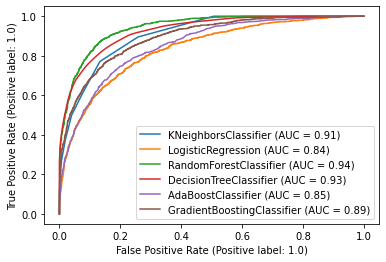

In [166]:
# Graph of AUC for Train Data
disp=plot_roc_curve(knn,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dec_tree,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ada,x_train,y_train,ax=disp.ax_)
plot_roc_curve(Grdnt,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

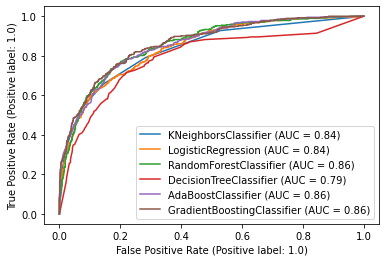

In [167]:
# Graph of AUC for Test Data
disp=plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dec_tree,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(Grdnt,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [168]:
import pickle

In [169]:
pickle.dump('lr',open('LogisticRegresion_model','wb'))

In [170]:
pickle.dump('ada',open('Adaboost_model','wb'))